## Array Based Sequences

In [2]:
# byte = 8 bits
# An implementation of a DynamicArray class
# using a raw array from the ctypes module as storage

import ctypes

class DynamicArray:
    """A dynamic array class akin to a simplified Python list."""
    def __init__(self):
        """Create an empty array."""
        self._n = 0                                         # count actual element
        self._capacity = 1                                  # default array capacity
        self._A = self._make_array(self._capacity)          # low-level array
        
    def __len__(self):
        """Rturn number of elements stored in the array."""
        return self._n

    def __getitem__(self, k):
        """Return element at index k."""
        if not 0 <= k < self._n:
            raise indexError('invalid index')
        return self._A[k]                                   # retrieve from array
    
    def append(self, obj):
        """Add object to end of the array"""
        if self._n == self._capacity:                       # not enough room
            self._resize(2 * self._capacity)                # so double capacity
        self._A[self._n] = obj
        self._n += 1
        
    def _resize(self, c):                                   # nonpublic utility
        """Resize internal array to capacity c."""
        B = self._make_array(c)                             # new (bigger) array
        for k in range(self._n):                            # for each existing value
            B[k] = self._A[k]
        self._A = B                                         # use the bigger array
        self._capacity = c
        
    def _make_array(self, c):                               # nonpublic utility
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()                     # see ctypes documentation

### At the lowest level, what is stored is a consecutive sequence of memory addresses at which the elements of the sequence reside.!

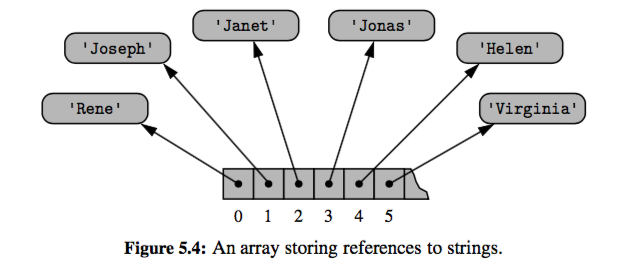

#### Although the relative size of the individual elements may very, the number of bits used to store the memory address of each element is fixed. 
#### In this way, Python can support constant-time access to a list or tuple element based on its index.